<a href="https://colab.research.google.com/github/Arulkon/Stone-Artifacts-Decay-Classification/blob/main/stone_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os
from PIL import Image

# Define paths
source_dir = r"/content/drive/MyDrive/Colab Notebooks/Dataset"  # Original images
augmented_dir = r"/content/drive/MyDrive/Colab Notebooks/Augmented_Dataset"  # Save augmented images

# Updated categories list
categories = ["algae", "black crust", "crack", "erosion", "graffiti"]
os.makedirs(augmented_dir, exist_ok=True)

# Data Augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Generate 5 augmented images per original image
for category in categories:
    source_folder = os.path.join(source_dir, category)
    output_folder = os.path.join(augmented_dir, category)
    os.makedirs(output_folder, exist_ok=True)

    images = [f for f in os.listdir(source_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(source_folder, img_name)

        try:
            with Image.open(img_path) as img:
                img.verify()  # Check if image is valid

            image = load_img(img_path)  # Load image
            image_array = img_to_array(image)  # Convert to array
            image_array = image_array.reshape((1,) + image_array.shape)  # Reshape for generator

            # Generate 5 augmented images
            i = 0
            for batch in datagen.flow(image_array, batch_size=1, save_to_dir=output_folder,
                                      save_prefix="aug", save_format="jpeg"):
                i += 1
                if i >= 5:  # Stop after 5 variations
                    break
        except Exception as e:
            print(f"❌ Skipping {img_name}: {e}")

print("✅ Augmentation completed. Each image has 5 variations, total dataset expanded.")

❌ Skipping images37.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/crack/images37.jpg'
❌ Skipping images36.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/crack/images36.jpg'
❌ Skipping images35.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/crack/images35.jpg'
❌ Skipping images34.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/crack/images34.jpg'
❌ Skipping 01000000-0aff-0242-df4c-08db18bf9968_w1071_s_d3.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/graffiti/01000000-0aff-0242-df4c-08db18bf9968_w1071_s_d3.jpg'
❌ Skipping 01000000-0aff-0242-6153-08db18bf9743_w1071_s_d3.jpg: cannot identify image file '/content/drive/MyDrive/Colab Notebooks/Dataset/graffiti/01000000-0aff-0242-6153-08db18bf9743_w1071_s_d3.jpg'
❌ Skipping a5f867d1-32f5-4d93-8f5b-51838f3fc4d4-2060x1018.jpg: cannot identify image file '/content/drive/MyDrive/Cola

In [ ]:
import os
import shutil
import random

# Define paths
train_dir = r"/content/drive/MyDrive/Colab Notebooks/train"
test_dir = r"/content/drive/MyDrive/Colab Notebooks/test"

# Updated categories list
categories = ["algae", "black crust", "crack", "erosion", "graffiti"]

# Create train/test directories
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Split augmented data into 90% training, 10% testing
for category in categories:
    source_folder = os.path.join(augmented_dir, category)
    images = os.listdir(source_folder)
    random.shuffle(images)

    split_index = int(0.9 * len(images))  # 90% training

    train_images = images[:split_index]
    test_images = images[split_index:]

    # Move images to train folder
    for img in train_images:
        shutil.copy(os.path.join(source_folder, img), os.path.join(train_dir, category, img))

    # Move images to test folder
    for img in test_images:
        shutil.copy(os.path.join(source_folder, img), os.path.join(test_dir, category, img))

print("✅ Dataset split completed for 5 classifications: 90% training, 10% testing.")


✅ Dataset split completed for 5 classifications: 90% training, 10% testing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Image Preprocessing
img_size = (150, 150)
batch_size = 16

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Only Rescale for Test Set (No Augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# Define CNN Model with Batch Normalization and Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),  # Use Input() instead of input_shape in Conv2D
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation='softmax')  # Changed for 5-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Early Stopping & Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True)  # ✅ Use `.keras` instead of `.h5`

# Train Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

# Save Model
model.save("image_classifier.keras")
print("✅ Model trained and saved successfully.")

Found 2435 images belonging to 5 classes.
Found 274 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.6181 - loss: 1.4383 - val_accuracy: 0.3540 - val_loss: 4.6439
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.7028 - loss: 0.9028 - val_accuracy: 0.1971 - val_loss: 2.3107
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - accuracy: 0.7324 - loss: 0.7833 - val_accuracy: 0.4161 - val_loss: 1.6498
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.7417 - loss: 0.7725 - val_accuracy: 0.6168 - val_loss: 0.9239
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7416 - loss: 0.6861 - val_accuracy: 0.7263 - val_loss: 0.8272
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.7278 - loss: 0.7671 - val_accuracy: 0.5803 - val_loss: 1.3634
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.7518 - loss: 0.7257 - val_accuracy: 0.3978 - val_loss: 2.7020
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.7594 - loss: 0.6814 - val_accu

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Image Preprocessing
img_size = (150, 150)
batch_size = 16

# Define paths for saving the model
colab_model_path = "/content/image_classifier.keras"  # Save in Colab

drive_model_path = "/content/drive/MyDrive/Colab Notebooks/image_classifier.keras"  # Save in Drive

# Ensure Drive is mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Only Rescale for Test Set (No Augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

# Define CNN Model with Batch Normalization and Dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150,150,3)),  # Use Input() instead of input_shape in Conv2D
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(5, activation='softmax')  # Changed for 5-class classification
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Early Stopping & Model Checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint(colab_model_path, monitor='val_accuracy', save_best_only=True)  # Save best model in Colab

# Train Model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

# Save Model in Both Locations
model.save(colab_model_path)
model.save(drive_model_path)
print("✅ Model trained and saved successfully in both Colab and Drive.")



Mounted at /content/drive
Found 2435 images belonging to 5 classes.
Found 274 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 535s 3s/step - accuracy: 0.6301 - loss: 1.3766 - val_accuracy: 0.3540 - val_loss: 5.7831
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7146 - loss: 0.8982 - val_accuracy: 0.3832 - val_loss: 2.4043
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.7515 - loss: 0.7430 - val_accuracy: 0.6642 - val_loss: 1.0897
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.7750 - loss: 0.6712 - val_accuracy: 0.8102 - val_loss: 0.5411
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7801 - loss: 0.6270 - val_accuracy: 0.7190 - val_loss: 0.9552
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.7841 - loss: 0.6452 - val_accuracy: 0.8212 - val_loss: 0.4987
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.8087 - loss: 0.5876 - val_accuracy: 0.7372 - val_loss: 0.7447
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.8151 - loss: 0.5543 - val_accu

✅ Model loaded successfully.
Found 196 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

       Algae       0.83      1.00      0.91        25
 Black_Crust       0.32      0.84      0.46        25
       Crack       0.50      0.91      0.65        23
     Erosion       0.32      0.32      0.32        25
    Graffiti       0.30      0.42      0.35        24
     Invalid       0.00      0.00      0.00        74

    accuracy                           0.43       196
   macro avg       0.38      0.58      0.45       196
weighted avg       0.28      0.43      0.33       196


Confusion Matrix:
 [[25  0  0  0  0  0]
 [ 0 21  1  3  0  0]
 [ 0  2 21  0  0  0]
 [ 0 10  7  8  0  0]
 [ 3  2  2  7 10  0]
 [ 2 31 11  7 23  0]]


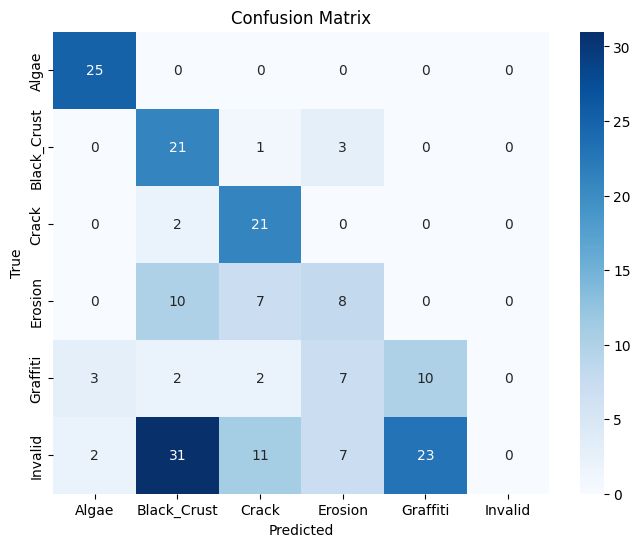

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
model_path = "/content/drive/MyDrive/Colab Notebooks/image_classifier.keras"
test_data_path = "/content/drive/MyDrive/Colab Notebooks/test"

# Load model
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully.")

# Image size and batch size (same as training)
img_size = (150, 150)
batch_size = 16

# Test data generator (only rescaling)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Important! Don't shuffle for correct label order
)

# Predict
test_generator.reset()
Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Classification report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("\nClassification Report:\n", report)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

# Load the trained model
model_path = "/content/drive/MyDrive/Colab Notebooks/image_classifier.keras"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")
model = load_model(model_path)

# Define class labels
class_labels = ["Algae", "Black Crust", "Crack", "Erosion", "Graffiti"]

# Path to your test images
test_folder = "/content/drive/MyDrive/Colab Notebooks/predict"

# ====== Define true labels manually here ======
# Format: {"filename.jpg": "TrueLabel", ...}
true_labels = {
    "algae.png": "Algae",
    "crack.png": "Crack",
    "graffiti.png": "Graffiti",
    "erosion.png": "Erosion",
    "black crust.png": "Black Crust"
    # Add your test images and their true classes here
}
# ===============================================

# Lists to collect true and predicted labels
y_true = []
y_pred = []

# Function to predict and collect results
def classify_test_images(test_folder):
    for filename in os.listdir(test_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(test_folder, filename)

            try:
                # Load and preprocess image
                img = image.load_img(img_path, target_size=(150, 150))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                # Predict
                prediction = model.predict(img_array)
                predicted_class = class_labels[np.argmax(prediction)]

                # Store results
                true_label = true_labels.get(filename)
                if true_label is None:
                    print(f"⚠️ True label for {filename} not found. Skipping.")
                    continue

                y_true.append(true_label)
                y_pred.append(predicted_class)

                # Print per-image prediction (optional)
                print(f"✅ {filename}: Predicted = {predicted_class} | True = {true_label}")

            except Exception as e:
                print(f"❌ Error processing image {filename}: {e}")

# Call function
classify_test_images(test_folder)

# Check if predictions were made
if len(y_true) == 0 or len(y_pred) == 0:
    print("❌ No predictions made. Please check your test images and true_labels mapping.")
else:
    # Print classification report
    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Plot confusion matrix
    print("📊 Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
⚠️ True label for Screenshot 2025-03-13 102208.png not found. Skipping.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
⚠️ True label for Screenshot 2025-03-13 102324.png not found. Skipping.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
✅ algae.png: Predicted = Algae | True = Algae
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
⚠️ True label for Screenshot 2025-03-13 104818.png not found. Skipping.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
✅ black crust.png: Predicted = Black Crust | True = Black Crust

📊 Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 5. Try specifying the labels parameter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


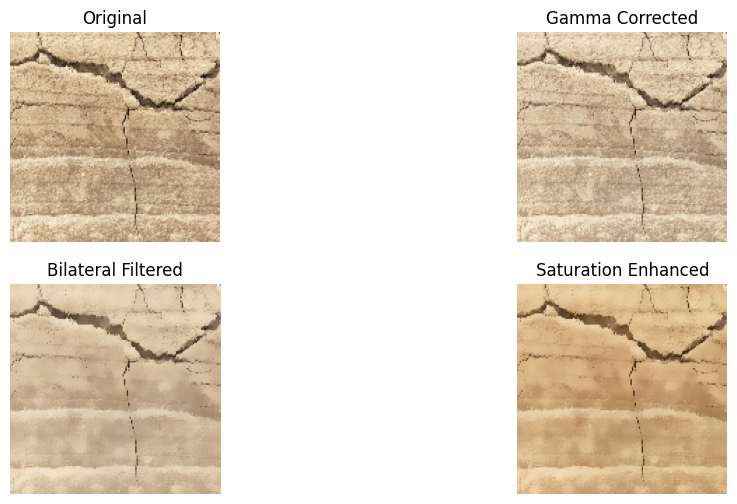

📌 Prediction: Crack (Confidence: 0.5766)
🔍 Classification Details:
Algae: 0.0000
Black Crust: 0.0014
Crack: 0.5766
Erosion: 0.4213
Graffiti: 0.0007
---------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


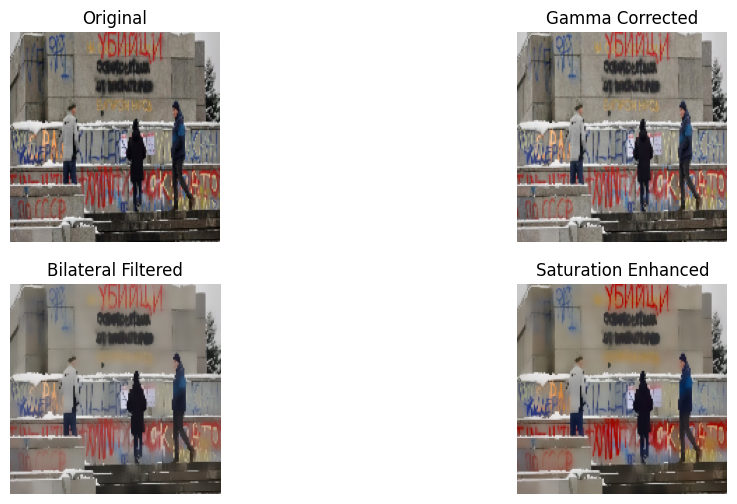

📌 Prediction: Graffiti (Confidence: 0.7978)
🔍 Classification Details:
Algae: 0.0001
Black Crust: 0.0015
Crack: 0.0230
Erosion: 0.1777
Graffiti: 0.7978
---------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


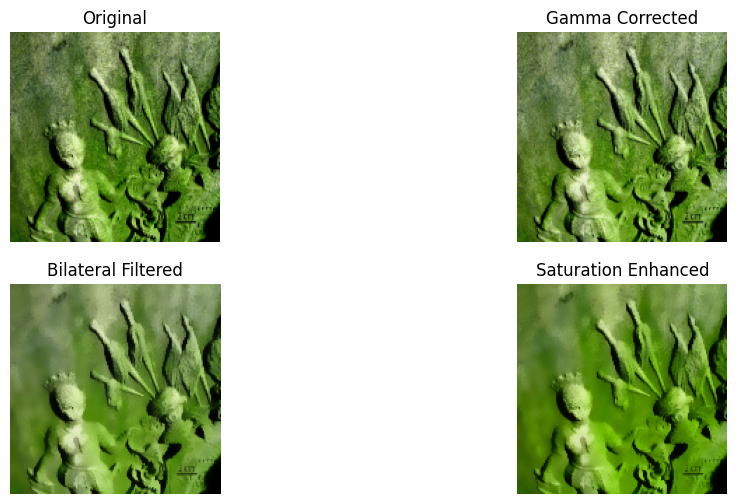

📌 Prediction: Algae (Confidence: 1.0000)
🔍 Classification Details:
Algae: 1.0000
Black Crust: 0.0000
Crack: 0.0000
Erosion: 0.0000
Graffiti: 0.0000
---------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


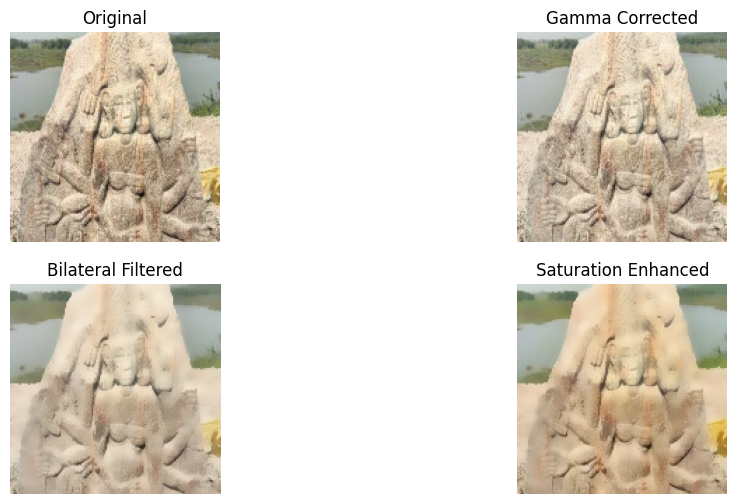

📌 Prediction: Erosion (Confidence: 0.5135)
🔍 Classification Details:
Algae: 0.0000
Black Crust: 0.0075
Crack: 0.4782
Erosion: 0.5135
Graffiti: 0.0008
---------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


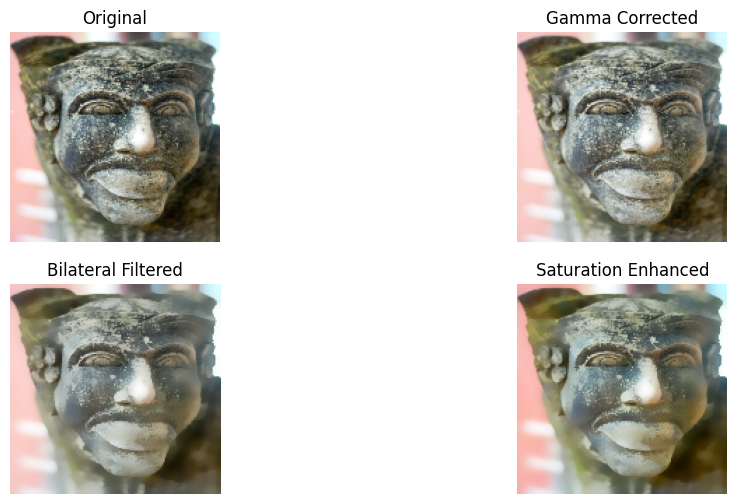

📌 Prediction: Black Crust (Confidence: 0.7689)
🔍 Classification Details:
Algae: 0.0642
Black Crust: 0.7689
Crack: 0.0281
Erosion: 0.1363
Graffiti: 0.0025
---------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model from Google Drive
model_path = "/content/drive/MyDrive/Colab Notebooks/image_classifier.keras"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")
model = load_model(model_path)
model.save("/content/drive/MyDrive/Colab Notebooks/image_classifier.h5")

# Define class labels
class_labels = ["Algae", "Black Crust", "Crack", "Erosion", "Graffiti"]

# Path to input images folder
predict_folder = "/content/drive/MyDrive/Colab Notebooks/predict"

# Function for enhanced preprocessing
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (150, 150))  # Resize to match model input

    # 1️⃣ Gamma Correction to prevent excessive contrast boost
    gamma = 1.2  # Slightly lighten darker areas without over-enhancing
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    img_gamma = cv2.LUT(img, table)

    # 2️⃣ Bilateral Filtering to reduce noise while preserving edges
    img_filtered = cv2.bilateralFilter(img_gamma, d=9, sigmaColor=75, sigmaSpace=75)

    # 3️⃣ Increase Saturation to enhance color features for Graffiti classification
    hsv = cv2.cvtColor(img_filtered, cv2.COLOR_RGB2HSV)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.5, 0, 255)  # Increase saturation by 1.5x
    img_final = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    img_array = img_final.astype(np.float32) / 255.0  # Normalize (0-1 scale)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    return img_array, img, img_gamma, img_filtered, img_final

# Function to classify an input image and display details
def classify_image(img_path):
    try:
        # Preprocess the image
        img_array, original, gamma_corrected, filtered, final = preprocess_image(img_path)

        # Predict
        prediction = model.predict(img_array)
        predicted_class = class_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

        # Display images
        plt.figure(figsize=(12, 6))
        titles = ["Original", "Gamma Corrected", "Bilateral Filtered", "Saturation Enhanced"]
        images = [original, gamma_corrected, filtered, final]

        for i in range(4):
            plt.subplot(2, 2, i + 1)
            plt.imshow(images[i])
            plt.axis("off")
            plt.title(titles[i])

        plt.show()

        # Print detailed results
        print(f"📌 Prediction: {predicted_class} (Confidence: {confidence:.4f})")
        print("🔍 Classification Details:")
        for label, score in zip(class_labels, prediction[0]):
            print(f"{label}: {score:.4f}")
        print("---------------------------------------------")
    except Exception as e:
        print(f"❌ Error processing image {img_path}: {e}")

# Function to classify all images in the predict folder
def classify_all_images(predict_folder):
    if not os.path.exists(predict_folder):
        print(f"❌ Prediction folder not found: {predict_folder}")
        return

    images = [os.path.join(predict_folder, img) for img in os.listdir(predict_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not images:
        print("❌ No valid images found in prediction folder.")
        return

    for img_path in images:
        classify_image(img_path)

# Classify all images in the prediction folder
classify_all_images(predict_folder)
